In [1]:
from scipy.optimize import newton
import numpy as np
import matplotlib.pyplot as plt

#Problem 1

class Solow:
    def __init__(self,n,s,delta,A,alpha,k):
        self.n = n
        self.s = s
        self.delta = delta
        self.A = A
        self.alpha = alpha
        self.k = k #capital per worker
    
    def update_k(self):
        """
        updates capital per capita from 1 period to the next
        """
        self.k += self.s*self.f(self.k)-(self.delta+self.n)*self.k
    
    def get_kstar(self):
        """
        computes the steady state level of k
        """
        return newton(lambda kstar: self.s*self.f(kstar)-(self.delta+self.n)*kstar, 5)
    
    def simulate(self,t):
        """
        simulates the model for t periods, and returns an array of k's
        """
        k_values = np.zeros(t)
        k_values[0] = self.k
        
        for year in np.arange(1,t):
            self.update_k()
            k_values[year] = self.k
        
        return k_values
    
    def f(self,k):
        """
        computes output per worker
        """
        return self.A*(k**self.alpha)

In [2]:
#Problem 2
China = Solow(k=0.5, n=0.1, s=0.4, A=1.5, alpha = 1/3, delta = 0.1)

USA = Solow(k=3, n = 0.02, s = 0.2, A = 3, alpha = 1/3, delta = 0.1)

China_kstar = China.get_kstar()
USA_kstar = USA.get_kstar()

print("China k*:",China_kstar,"\nUSA k*:",USA_kstar)

China k*: 5.196152422706632 
USA k*: 11.180339887498947


China k's: [0.5        0.87622032 1.27512227 1.67072948 2.04853981 2.4008513
 2.72409555 3.01724044 3.2807966  3.5161845  3.7253263  3.91038184
 4.07357931 4.21710863 4.34305676 4.45337116 4.54984177 4.63409537
 4.70759772 4.77166066 4.82745193 4.87600657 4.9182387  4.95495337
 4.98685782 5.01457212 5.03863902 5.05953288 5.07766781 5.09340494
 5.10705896 5.11890381 5.12917789 5.13808851 5.14581585 5.1525165
 5.15832644 5.16336376 5.16773097 5.17151703 5.17479915 5.1776443
 5.18011058 5.18224839 5.18410143 5.18570761 5.18709978 5.18830645
 5.18935232 5.1902588 ] 

 USA k's: [ 3.          3.50534974  3.99614837  4.46874539  4.92077545  5.35082021
  5.7581628   6.14260604  6.50433588  6.84381784  7.16171796  7.45884204
  7.73608897  7.99441492  8.23480581  8.45825638  8.66575435  8.85826861
  9.03674057  9.20207799  9.35515074  9.49678814  9.62777741  9.74886314
  9.86074734  9.96409019 10.05951102 10.14758969 10.22886816 10.30385213
 10.37301287 10.43678897 10.49558822 10.54978933 10.599

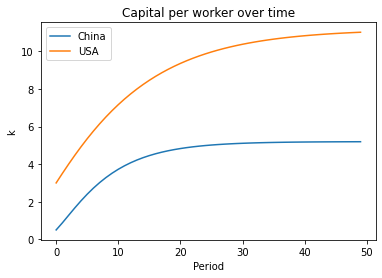

In [3]:
#Problem 3
China_k_values = China.simulate(50)
USA_k_values = USA.simulate(50)

print("China k's:",China_k_values,"\n\n","USA k's:",USA_k_values)

plt.plot(np.arange(50),China_k_values,label="China")
plt.plot(np.arange(50),USA_k_values,label="USA")

plt.legend()
plt.xlabel("Period")
plt.ylabel("k")
plt.title("Capital per worker over time")
plt.show()